# **Mission 1. Netfilx and Code**

In [1]:
import pandas as pd

In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'jhighllight'
os.environ['KAGGLE_KEY'] = 'xxxxxxxxxxxxxxxxxxxxxxx'

In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d shivamb/netflix-shows
!unzip '*.zip'

  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 176MB/s]
Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      


In [5]:
df_net = pd.read_csv('/content/netflix_titles.csv')

In [6]:
df_net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df_net.describe

<bound method NDFrame.describe of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail M

In [9]:
df_net['country']

0       United States
1        South Africa
2                 NaN
3                 NaN
4               India
            ...      
8802    United States
8803              NaN
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

## **한국 작품은 총 얼마나 있는가?**

`country column을 기준으로 한다.`

"South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [10]:
df_net['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

## **가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?**

`country column을 기준으로 한다.`

단일 국가인 경우를 기준으로 결과를 구해보자.

In [11]:
df_net_by_country = df_net.groupby('country')
df_net_by_country.count().sort_values(by='show_id', ascending=False).head(1)

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
country,,,,,,,,,,,
United States,2818,2818,2818,2048,2488,2812,2818,2818,2815,2818,2818


# **Mission 2. 가즈아!**


**5-MA(Moving Average) 비트코인 가격 그래프**

`선의 색깔은 노란색(#f2a900) 으로 해야합니다.`

`x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.`

`이동평균의 기준은 Open Column으로 계산합니다.`

`이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.`

`💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.`

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
import os

In [24]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'jhighllight'
os.environ['KAGGLE_KEY'] = 'xxxxxxxxxxxxxxxxxxxxxxx'

In [25]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d rishidamarla/bitcoin-prices-20112015
!unzip '*.zip'

bitcoin-prices-20112015.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bitcoin-prices-20112015.zip
replace BitCoin.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: BitCoin.csv             

Archive:  netflix-shows.zip
replace netflix_titles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: netflix_titles.csv      

2 archives were successfully processed.


In [26]:
df_Bit = pd.read_csv('/content/BitCoin.csv')

In [27]:
df_Bit.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000


In [28]:
df_Bit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609 entries, 0 to 1608
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1609 non-null   int64  
 1   Date        1609 non-null   object 
 2   Open        1609 non-null   float64
 3   High        1609 non-null   float64
 4   Low         1609 non-null   float64
 5   Close       1609 non-null   float64
 6   Volume      1609 non-null   float64
 7   Market Cap  1609 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 100.7+ KB


In [29]:
df_Bit.describe()

,Unnamed: 0,Open,High,Low,Close,Volume,Market Cap
count,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000,1.609000e+03,1.609000e+03
mean,804.000000,693.497433,712.776582,674.365525,695.563356,1.910350e+08,1.055802e+10
std,464.622607,797.365059,825.622752,768.109415,800.557569,4.728111e+08,1.334589e+10
min,0.000000,68.500000,74.560000,65.530000,68.430000,2.857830e+06,7.792550e+08
25%,402.000000,260.720000,265.610000,254.200000,260.890000,1.660970e+07,3.668040e+09
50%,804.000000,446.890000,452.480000,440.500000,447.530000,3.878908e+07,6.476080e+09
75%,1206.000000,701.340000,714.120000,670.880000,702.030000,8.524490e+07,1.032810e+10
max,1608.000000,4901.420000,4975.040000,4678.530000,4892.010000,4.148070e+09,8.106060e+10


In [30]:
df_Bit['Date'] = pd.to_datetime(df_Bit['Date'])

In [40]:
from datetime import datetime
coin = df_Bit.loc[(df_Bit['Date'] >= datetime.strptime('2016-06-01','%Y-%m-%d')) &(df_Bit['Date'] < datetime.strptime('2017-07-01','%Y-%m-%d'))]
coin = coin.sort_values('Date',ascending=True)
coin = coin.drop(['High','Low','Close','Volume','Market Cap'], axis=1)

In [41]:
from collections import deque
queue = deque()
data = []
for i in coin['Open']:
    queue.append(i)
    data.append(round(np.mean(queue),2))
    if len(queue) >= 5:
        queue.popleft()
coin = coin.assign(AVG=data)

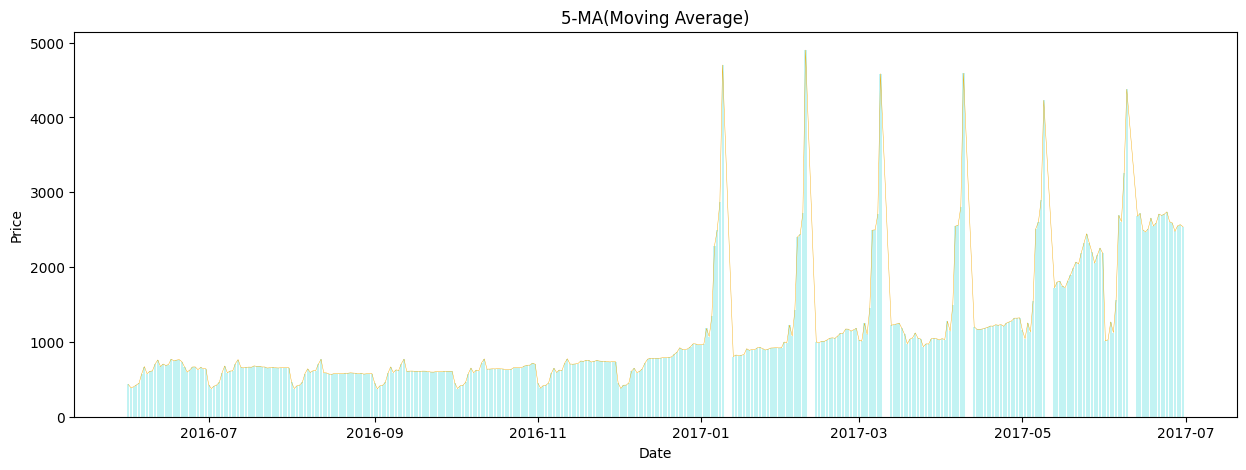

In [42]:
plt.figure(figsize=(15, 5))
plt.plot(coin['Date'], coin['Open'], color='#f2a900',linestyle="-",linewidth=0.3)
plt.bar(coin['Date'], coin['Open'], color="#c2f3f3")
plt.title('5-MA(Moving Average)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()